# GENERAL: TO DELETE

Found some crazy resources which will make our life much easier

> 1. [kaggle EEG Muse (meh)](https://www.kaggle.com/birdy654/eeg-brainwave-dataset-mental-state)
> 1. [Crazy code that makes literally 1000 features for you](https://github.com/jordan-bird/eeg-feature-generation)
> 1. [Explanation of features and their importance ans science and shite](https://link.springer.com/chapter/10.1007/978-3-030-29933-0_37)

-Almu

# General

## Fix Random State

In [150]:
SEED = 55;

## Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow.keras as kr
import seaborn as sns
import os
#import scipy

# Importing the Raw Data

In [3]:
%%time


# Get Current Working directory and append the data relative dir
cwd = os.getcwd()
notTiredDir = cwd + r"\Data\Raw\NotTired"
tiredDir = cwd + r"\Data\Raw\Tired"

# Hold file locations
filesTired=[];
filesNotTired=[];

#Populate file location arrays
for file in os.listdir(notTiredDir):
    if file.endswith('.csv'):
        filesNotTired.append(os.path.join(notTiredDir, file))
for file in os.listdir(tiredDir):
        if file.endswith('.csv'):
            filesTired.append(os.path.join(tiredDir, file))
            
#Test reading files by changing num1
num1=6;
sample = pd.read_csv(filesNotTired[num1])
sample 

Wall time: 8 ms


,TimeStamp,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,...,Gyro_X,Gyro_Y,Gyro_Z,HeadBandOn,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10,Battery,Elements
0,2021-11-01 17:54:38.045,1.110457,-0.382196,0.082630,0.743808,0.455723,-0.523256,0.086015,0.487615,0.493558,...,4.134674,-5.824432,-1.510315,1.0,1.0,2.0,1.0,1.0,70.0,NaN
1,2021-11-01 17:54:39.045,0.904642,-0.382196,0.236881,0.613098,0.313527,-0.523256,0.171247,0.546970,0.538756,...,4.329071,-2.990723,-1.644897,1.0,1.0,2.0,1.0,1.0,70.0,NaN
2,2021-11-01 17:54:39.187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/jaw_clench
3,2021-11-01 17:54:40.045,0.652124,-0.382196,0.462323,0.410327,0.293693,-0.523256,0.267178,0.466408,0.343593,...,5.622559,-5.099182,-0.732727,1.0,1.0,2.0,1.0,1.0,70.0,NaN
4,2021-11-01 17:54:41.043,0.558608,-0.382196,0.502156,0.877835,0.281408,-0.523256,0.337400,0.469669,0.381862,...,4.882355,-3.536530,-1.652374,1.0,1.0,2.0,1.0,1.0,70.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2021-11-01 17:56:57.042,1.011459,-0.382196,0.502156,0.955036,0.456557,-0.523256,0.337400,0.439388,0.575279,...,5.510406,-7.880554,-2.257996,1.0,1.0,4.0,2.0,1.0,70.0,NaN
157,2021-11-01 17:56:57.111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/blink
158,2021-11-01 17:56:57.852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/blink
159,2021-11-01 17:56:58.042,1.011459,-0.382196,0.502156,0.955036,0.456557,-0.523256,0.337400,0.439388,0.575279,...,4.844971,-6.190796,-2.781372,1.0,1.0,4.0,4.0,1.0,70.0,NaN


In [4]:
#Mini-Summary of Block
print(f"> {len(filesNotTired)} files were added from the NOT TIRED category")
print(f"> {len(filesTired)} files were added from the TIRED category\n")

> 22 files were added from the NOT TIRED category
> 10 files were added from the TIRED category



## Available Features

In [5]:
pd.DataFrame(sample.columns)

,0
0,TimeStamp
1,Delta_TP9
2,Delta_AF7
3,Delta_AF8
4,Delta_TP10
5,Theta_TP9
6,Theta_AF7
7,Theta_AF8
8,Theta_TP10
9,Alpha_TP9


## Raw Data Structure

In [6]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TimeStamp        161 non-null    object 
 1   Delta_TP9        141 non-null    float64
 2   Delta_AF7        141 non-null    float64
 3   Delta_AF8        141 non-null    float64
 4   Delta_TP10       141 non-null    float64
 5   Theta_TP9        141 non-null    float64
 6   Theta_AF7        141 non-null    float64
 7   Theta_AF8        141 non-null    float64
 8   Theta_TP10       141 non-null    float64
 9   Alpha_TP9        141 non-null    float64
 10  Alpha_AF7        141 non-null    float64
 11  Alpha_AF8        141 non-null    float64
 12  Alpha_TP10       141 non-null    float64
 13  Beta_TP9         141 non-null    float64
 14  Beta_AF7         141 non-null    float64
 15  Beta_AF8         141 non-null    float64
 16  Beta_TP10        141 non-null    float64
 17  Gamma_TP9       

# Data Preprocessing

## Creating the RAW Dataset

In [7]:
%%time
## Extract rows 21-25 from all files as these are the only 5 relevent features

rowsTired=[];
for f in filesTired:
    for r in range(pd.read_csv(f).shape[0]):
        rowsTired.append(pd.read_csv(f).iloc[r,[0, 21,22,23,24,25]])
        
rowsNotTired=[];
for f in filesNotTired:
    for r in range(pd.read_csv(f).shape[0]):
        rowsNotTired.append(pd.read_csv(f).iloc[r,[0, 21,22,23,24,25]])



Wall time: 3min 1s


In [151]:
data_NT = pd.DataFrame(rowsNotTired);
original_NT = data_NT.copy();
data_NT

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT
0,2021-11-01 17:27:27.362,792.967033,811.904762,769.194139,788.937729,680.549451
1,2021-11-01 17:27:28.362,751.465201,770.805861,780.879121,803.846154,799.816850
2,2021-11-01 17:27:29.362,747.435897,827.619048,793.369963,802.234432,906.190476
3,2021-11-01 17:27:30.371,838.901099,803.040293,803.443223,795.787546,817.142857
4,2021-11-01 17:27:31.366,809.890110,780.476190,798.205128,743.406593,785.311355
...,...,...,...,...,...,...
1666,2021-11-02 22:14:34.024,821.575092,778.058608,818.351648,836.080586,809.487179
1667,2021-11-02 22:14:35.026,773.626374,778.461538,813.113553,797.399267,712.783883
1668,2021-11-02 22:14:36.024,776.849817,800.219780,793.369963,803.040293,482.307692
1669,2021-11-02 22:14:37.024,812.307692,796.996337,788.937729,805.054945,712.783883


In [152]:
data_T = pd.DataFrame(rowsTired);
original_T = data_T.copy();
data_T

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT
0,2021-11-11 00:54:16.918,782.893773,767.985348,1100.805861,799.413919,732.930403
1,2021-11-11 00:54:17.318,NaN,NaN,NaN,NaN,NaN
2,2021-11-11 00:54:17.920,790.549451,887.655678,1648.791209,809.487179,734.139194
3,2021-11-11 00:54:18.686,NaN,NaN,NaN,NaN,NaN
4,2021-11-11 00:54:18.929,755.494505,0.000000,0.000000,732.124542,565.714286
...,...,...,...,...,...,...
452,2021-11-12 06:29:34.149,NaN,NaN,NaN,NaN,NaN
453,2021-11-12 06:29:34.364,845.347985,590.293040,1199.523810,852.197802,680.146520
454,2021-11-12 06:29:35.364,811.501832,514.542125,695.457875,851.794872,835.677656
455,2021-11-12 06:29:35.788,NaN,NaN,NaN,NaN,NaN


In [153]:
print(f"Not Tired Data size is: \t{data_NT.shape}", f"\nTired Data size is: \t\t{data_T.shape}")

Not Tired Data size is: 	(9685, 6) 
Tired Data size is: 		(10796, 6)


## Adding empty column 
Append an empty column in order to run the method.


In [154]:
#Conserve headers
headers = original_NT.columns.values.tolist()

#Stack ones or zeros for each class [0 = NotTired, 1 = Tired]
data_T = pd.DataFrame(np.hstack((data_T.to_numpy(),   np.zeros((data_T.shape[0], 1)) )))
data_NT= pd.DataFrame(np.hstack((data_NT.to_numpy(), np.zeros((data_NT.shape[0], 1)))))

In [155]:
#Reattach headers
data_T.columns =  np.hstack((headers, ['Empty']));
data_NT.columns = np.hstack((headers, ['Empty']));

#Check
data_NT

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT,Empty
0,2021-11-01 17:27:27.362,792.967033,811.904762,769.194139,788.937729,680.549451,0.0
1,2021-11-01 17:27:28.362,751.465201,770.805861,780.879121,803.846154,799.81685,0.0
2,2021-11-01 17:27:29.362,747.435897,827.619048,793.369963,802.234432,906.190476,0.0
3,2021-11-01 17:27:30.371,838.901099,803.040293,803.443223,795.787546,817.142857,0.0
4,2021-11-01 17:27:31.366,809.89011,780.47619,798.205128,743.406593,785.311355,0.0
...,...,...,...,...,...,...,...
9680,2021-11-02 22:14:34.024,821.575092,778.058608,818.351648,836.080586,809.487179,0.0
9681,2021-11-02 22:14:35.026,773.626374,778.461538,813.113553,797.399267,712.783883,0.0
9682,2021-11-02 22:14:36.024,776.849817,800.21978,793.369963,803.040293,482.307692,0.0
9683,2021-11-02 22:14:37.024,812.307692,796.996337,788.937729,805.054945,712.783883,0.0


## Remove Empty Rows

In [156]:
data_T = data_T.dropna()

In [157]:
data_NT = data_NT.dropna()

## Convert Datetime Column to Timestamps

In [158]:
from datetime import datetime

ind = 0;
for time in data_T.iloc[:, 0]:
    tmstmp = datetime.strptime(str(time), '%Y-%m-%d %H:%M:%S.%f').timestamp()
    data_T.iat[ind, 0] = (tmstmp);
    ind=ind+1;
    
ind = 0;
for time in data_NT.iloc[:, 0]:
    tmstmp = datetime.strptime(str(time), '%Y-%m-%d %H:%M:%S.%f').timestamp()
    data_NT.iat[ind, 0] = (tmstmp);
    ind=ind+1;



In [159]:
data_NT.head()

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT,Empty
0,1635812847.362,792.967033,811.904762,769.194139,788.937729,680.549451,0.0
1,1635812848.362,751.465201,770.805861,780.879121,803.846154,799.81685,0.0
2,1635812849.362,747.435897,827.619048,793.369963,802.234432,906.190476,0.0
3,1635812850.371,838.901099,803.040293,803.443223,795.787546,817.142857,0.0
4,1635812851.366,809.89011,780.47619,798.205128,743.406593,785.311355,0.0


## Save RAW Data to File

In [160]:
savelocT = cwd + r"\Data\Preprocessed\Tired.csv"
savelocNT = cwd + r"\Data\Preprocessed\NotTired.csv"

if os.path.exists(savelocT):
    os.remove(savelocT)
    
if os.path.exists(savelocNT):
    os.remove(savelocNT)

data_T.to_csv(savelocT,  mode='w', index = False)
data_NT.to_csv(savelocNT,mode='w', index = False)


## EEG Feature Generation

In [161]:
from eegFG import EEG_feature_extraction as FG

Nsamp = 50;
Perio = 6;

xT, yT = FG.generate_feature_vectors_from_samples(file_path=savelocT,
                                         nsamples=Nsamp, 
                                         period=Perio,
                                         #state=data_NT.iloc[:,-1],
                                         slide_percent=0.05,
                                         remove_redundant=False, 
                                         cols_to_ignore=None)
xT.shape

C:\Users\Al\anaconda3\lib\site-packages\scipy\linalg\_matfuncs_inv_ssq.py:827: LogmExactlySingularWarning: The logm input matrix is exactly singular.
  warnings.warn(exact_singularity_msg, LogmExactlySingularWarning)


(119, 984)

In [162]:
Nsamp = 50;
Perio = 5;

xNT, yNT = FG.generate_feature_vectors_from_samples(file_path=savelocNT,
                                         nsamples=Nsamp, 
                                         period=Perio,
                                         #state=data_NT.iloc[:,-1],
                                         slide_percent=0.06,
                                         remove_redundant=False, 
                                         cols_to_ignore=None)
xNT.shape

(219, 984)

```python

%%time

from importlib import reload

flaggity=False

tmp_results=[]
thresh = 95;
for ns in range(50,256,1):
    if (flaggity==True):
        break;
    for p in range(3,8):
        
        try:
            reload(FG);
            xT, yT = FG.generate_feature_vectors_from_samples(file_path=savelocT,
                                 nsamples=ns, 
                                 period=p,
                                 #state=data_NT.iloc[:,-1],
                                 slide_percent=0.01,
                                 remove_redundant=False, 
                                 cols_to_ignore=None)
            
            xNT, yNT = FG.generate_feature_vectors_from_samples(file_path=savelocNT,
                                 nsamples=ns, 
                                 period=p,
                                 #state=data_NT.iloc[:,-1],
                                 slide_percent=0.01,
                                 remove_redundant=False, 
                                 cols_to_ignore=None)
        
        except (UnboundLocalError):
            continue;
            
        
        if (xNT.shape[1] == xT.shape[1]):
            print('Cols match!', xT.shape, xNT.shape)
            if (xNT.shape[0] >= thresh and xT.shape[0] >= thresh):
                print('Thresh met.')
                tmp_results.append((ns,p,xNT.shape[0],xT.shape[0],xNT.shape[1]))
                flaggity=True;
                break;
                
                
tmp_results

```

In [163]:
X_NT = pd.DataFrame(xNT)
X_NT.columns = np.hstack((['TimeStamp'], yNT))
X_NT.describe()

,TimeStamp,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_5,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,...,freq_156_5,freq_167_5,freq_177_5,freq_188_5,freq_198_5,freq_208_5,freq_219_5,freq_229_5,freq_240_5,freq_250_5
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.0,219.000000,219.000000,219.000000,219.000000,...,219.0,219.0,219.0,219.0,219.0,219.0,219.0,219.0,219.0,219.0
mean,779.105307,790.250350,793.258774,774.799042,826.072764,0.0,0.795194,-0.121172,0.069205,-2.103254,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,13.221727,13.962959,10.783482,15.090785,48.215973,0.0,29.464956,27.057741,19.906972,39.864481,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,742.197802,753.641026,778.260073,731.721612,730.996337,0.0,-88.384188,-79.917043,-84.016933,-130.084391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,773.142857,786.197802,785.391941,770.543956,795.304029,0.0,-20.452674,-10.171238,-8.063057,-17.210459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,780.717949,793.531136,791.194139,776.608059,825.362637,0.0,0.764957,3.152271,1.392108,0.776751,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,790.065934,797.560440,797.399267,784.102564,849.296703,0.0,18.143992,11.409339,11.061487,15.138016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,797.479853,813.838828,826.329670,816.578755,970.981685,0.0,81.924841,93.667981,65.789165,145.152860,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
pd.DataFrame(X_NT)

,TimeStamp,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_5,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,...,freq_156_5,freq_167_5,freq_177_5,freq_188_5,freq_198_5,freq_208_5,freq_219_5,freq_229_5,freq_240_5,freq_250_5
0,788.131868,798.769231,789.018315,786.842491,797.802198,0.0,55.860118,-1.775760,12.502775,-30.339521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,788.131868,798.769231,789.018315,786.842491,797.802198,0.0,55.860118,-1.775760,12.502775,-30.339521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,788.131868,798.769231,789.018315,786.842491,797.802198,0.0,55.860118,-1.775760,12.502775,-30.339521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,788.131868,798.769231,789.018315,786.842491,797.802198,0.0,55.860118,-1.775760,12.502775,-30.339521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,782.571429,798.688645,794.336996,789.582418,827.377289,0.0,3.583346,-14.421597,0.365225,-17.210459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,779.428571,795.223443,792.644689,746.791209,825.443223,0.0,18.562297,18.482367,1.528074,-69.931473,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
215,779.428571,795.223443,792.644689,746.791209,825.443223,0.0,18.562297,18.482367,1.528074,-69.931473,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
216,779.428571,795.223443,792.644689,746.791209,825.443223,0.0,18.562297,18.482367,1.528074,-69.931473,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
217,778.380952,794.095238,795.062271,745.098901,814.644689,0.0,10.739133,1.946408,1.280510,20.558404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
X_T = pd.DataFrame(xT)
X_T.columns = np.hstack((['TimeStamp'], yT))
X_T.describe()

,TimeStamp,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_5,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,...,freq_156_5,freq_167_5,freq_177_5,freq_188_5,freq_198_5,freq_208_5,freq_219_5,freq_229_5,freq_240_5,freq_250_5
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.0,119.000000,119.000000,119.000000,119.000000,...,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02
mean,853.022850,742.893619,911.472025,844.334452,784.668021,0.0,1.439227,-0.123772,-0.581400,4.849069,...,5.439934e-18,8.313440e-19,1.012543e-18,9.806274e-19,7.549416e-19,1.107075e-18,7.246946e-19,9.032981e-19,8.943504e-19,7.033148e-19
std,118.126749,251.525994,217.512393,104.498981,33.160809,0.0,254.559496,381.727887,256.604333,246.614039,...,1.069026e-17,2.118224e-18,1.971696e-18,1.909547e-18,1.923554e-18,4.824729e-18,1.846486e-18,1.758966e-18,1.741543e-18,1.792012e-18
min,732.796093,350.818071,532.069597,664.499389,705.665446,0.0,-628.239954,-655.880639,-731.972815,-460.710955,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,765.869963,558.797314,777.084860,784.841270,770.570818,0.0,-34.380751,-320.332371,-73.953916,-43.008357,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,805.189255,626.153846,882.954823,803.308913,794.645910,0.0,-0.355619,88.870928,7.618361,-12.709321,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,934.731380,967.301587,950.042735,876.507937,810.024420,0.0,30.105383,252.124660,124.322869,29.953412,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1152.985348,1349.884005,1541.947497,1150.097680,823.656899,0.0,717.580021,901.701208,607.799946,898.762093,...,4.176465e-17,6.183121e-18,4.819705e-18,4.667786e-18,5.614878e-18,2.195698e-17,5.389916e-18,4.299699e-18,4.257108e-18,5.230904e-18


In [166]:
# Drop TimeStamp

X_T=X_T.iloc[:,1:];
X_NT=X_NT.iloc[:,1:];

In [167]:
#Stack ones or zeros for each class [0 = NotTired, 1 = Tired]
X_T = pd.DataFrame(np.hstack((X_T.to_numpy(),   np.ones((X_T.shape[0], 1)) )))
X_NT= pd.DataFrame(np.hstack((X_NT.to_numpy(), np.zeros((X_NT.shape[0], 1)))))

In [168]:
X_T.columns  = np.hstack((yT, ['Target']))
X_NT.columns = np.hstack((yNT, ['Target']))

In [169]:
print(X_T.shape[0], X_NT.shape[0])

if (X_T.shape[1] == X_NT.shape[1]):
    dataset = np.vstack((X_T, X_NT))
    dataset = pd.DataFrame(dataset)
    print('\n')
else:
    print('ATTENTION')


119 219




## Randomize the Dataset

In [170]:
dataset.columns = np.hstack((yT, ['Target']))
dataset = dataset.sample(frac = 1).reset_index(drop=True)
dataset

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_5,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,...,freq_167_5,freq_177_5,freq_188_5,freq_198_5,freq_208_5,freq_219_5,freq_229_5,freq_240_5,freq_250_5,Target
0,758.879121,810.615385,782.732601,766.937729,0.0,21.368993,41.454158,-21.360518,27.869399,-70.121770,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
1,519.041514,847.362637,784.841270,819.560440,0.0,-0.198131,-76.798723,58.362914,-15.595206,40.811060,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
2,801.267399,796.754579,779.428571,859.450549,0.0,-6.152120,-16.716593,-9.538950,0.776751,-187.339246,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
3,578.137973,711.910867,999.334554,713.186813,0.0,-514.897686,137.587373,75.247549,-141.891011,231.658823,...,6.183121e-18,4.819705e-18,4.667786e-18,5.614878e-18,0.0,5.389916e-18,4.299699e-18,4.257108e-18,5.230904e-18,1.0
4,794.095238,795.062271,745.098901,814.644689,0.0,10.739133,1.946408,1.280510,20.558404,-45.274115,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,775.708181,810.763126,781.483516,819.694750,0.0,55.126133,40.655380,-68.174819,54.458727,260.250680,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
334,1015.720391,950.042735,848.235653,788.601954,0.0,-14.972331,-396.019945,-28.770954,-21.329183,44.131002,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
335,769.597070,793.208791,731.721612,911.267399,0.0,-36.295877,-45.880417,-13.909999,28.596920,-29.028232,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
336,1079.181929,1271.312576,786.520147,785.512821,0.0,110.442909,-539.842669,-115.341590,34.235594,52.969837,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0


## Separating Input and Output

In [171]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting Dataset into the Training and Test Sets

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = SEED)

## Feature Scaling


In [173]:
from sklearn.preprocessing import StandardScaler
scX = StandardScaler();
scX.fit(X_train); #Fit to training data only
x = scX.transform(x)

In [174]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,973,974,975,976,977,978,979,980,981,982
0,-0.073219,-0.163442,-0.218345,-0.941488,0.0,0.175435,0.134593,-0.144057,0.254611,-0.684691,...,-0.289122,-0.224908,-0.290409,-0.290409,-0.224908,-0.137361,-0.224908,-0.290409,-0.290409,-0.224908
1,-1.606790,0.093264,-0.189659,0.166004,0.0,0.036009,-0.390920,0.367430,-0.056274,0.400115,...,-0.289122,-0.224908,-0.290409,-0.290409,-0.224908,-0.137361,-0.224908,-0.290409,-0.290409,-0.224908
2,0.197820,-0.260270,-0.263293,1.005528,0.0,-0.002482,-0.123916,-0.068212,0.060828,-1.830955,...,-0.289122,-0.224908,-0.290409,-0.290409,-0.224908,-0.137361,-0.224908,-0.290409,-0.290409,-0.224908
3,-1.228915,-0.852965,2.728320,-2.072724,0.0,-3.291408,0.561807,0.475758,-0.959619,2.266404,...,5.493311,4.446260,3.443420,3.443420,4.446260,-0.137361,4.446260,3.443420,3.443420,4.446260
4,0.151960,-0.272092,-0.730316,0.062548,0.0,0.106716,-0.040978,0.001203,0.202319,-0.441708,...,-0.289122,-0.224908,-0.290409,-0.290409,-0.224908,-0.137361,-0.224908,-0.290409,-0.290409,-0.224908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,0.034389,-0.162410,-0.235338,0.168831,0.0,0.393668,0.131043,-0.444406,0.444795,2.546003,...,-0.289122,-0.224908,-0.290409,-0.290409,-0.224908,-0.137361,-0.224908,-0.290409,-0.290409,-0.224908
334,1.569076,0.810559,0.672762,-0.485545,0.0,-0.059503,-1.809531,-0.191600,-0.097287,0.432580,...,-0.289122,-0.224908,-0.290409,-0.290409,-0.224908,-0.137361,-0.224908,-0.290409,-0.290409,-0.224908
335,-0.004687,-0.285040,-0.912302,2.096060,0.0,-0.197355,-0.253520,-0.096256,0.259815,-0.282840,...,-0.289122,-0.224908,-0.290409,-0.290409,-0.224908,-0.137361,-0.224908,-0.290409,-0.290409,-0.224908
336,1.974862,3.054862,-0.166819,-0.550558,0.0,0.751278,-2.448676,-0.747017,0.300146,0.519015,...,-0.289122,-0.224908,-0.290409,-0.290409,-0.224908,-0.137361,-0.224908,-0.290409,-0.290409,-0.224908


# Data Exploration

## General Correlation Matrix

<Figure size 1800x1200 with 0 Axes>

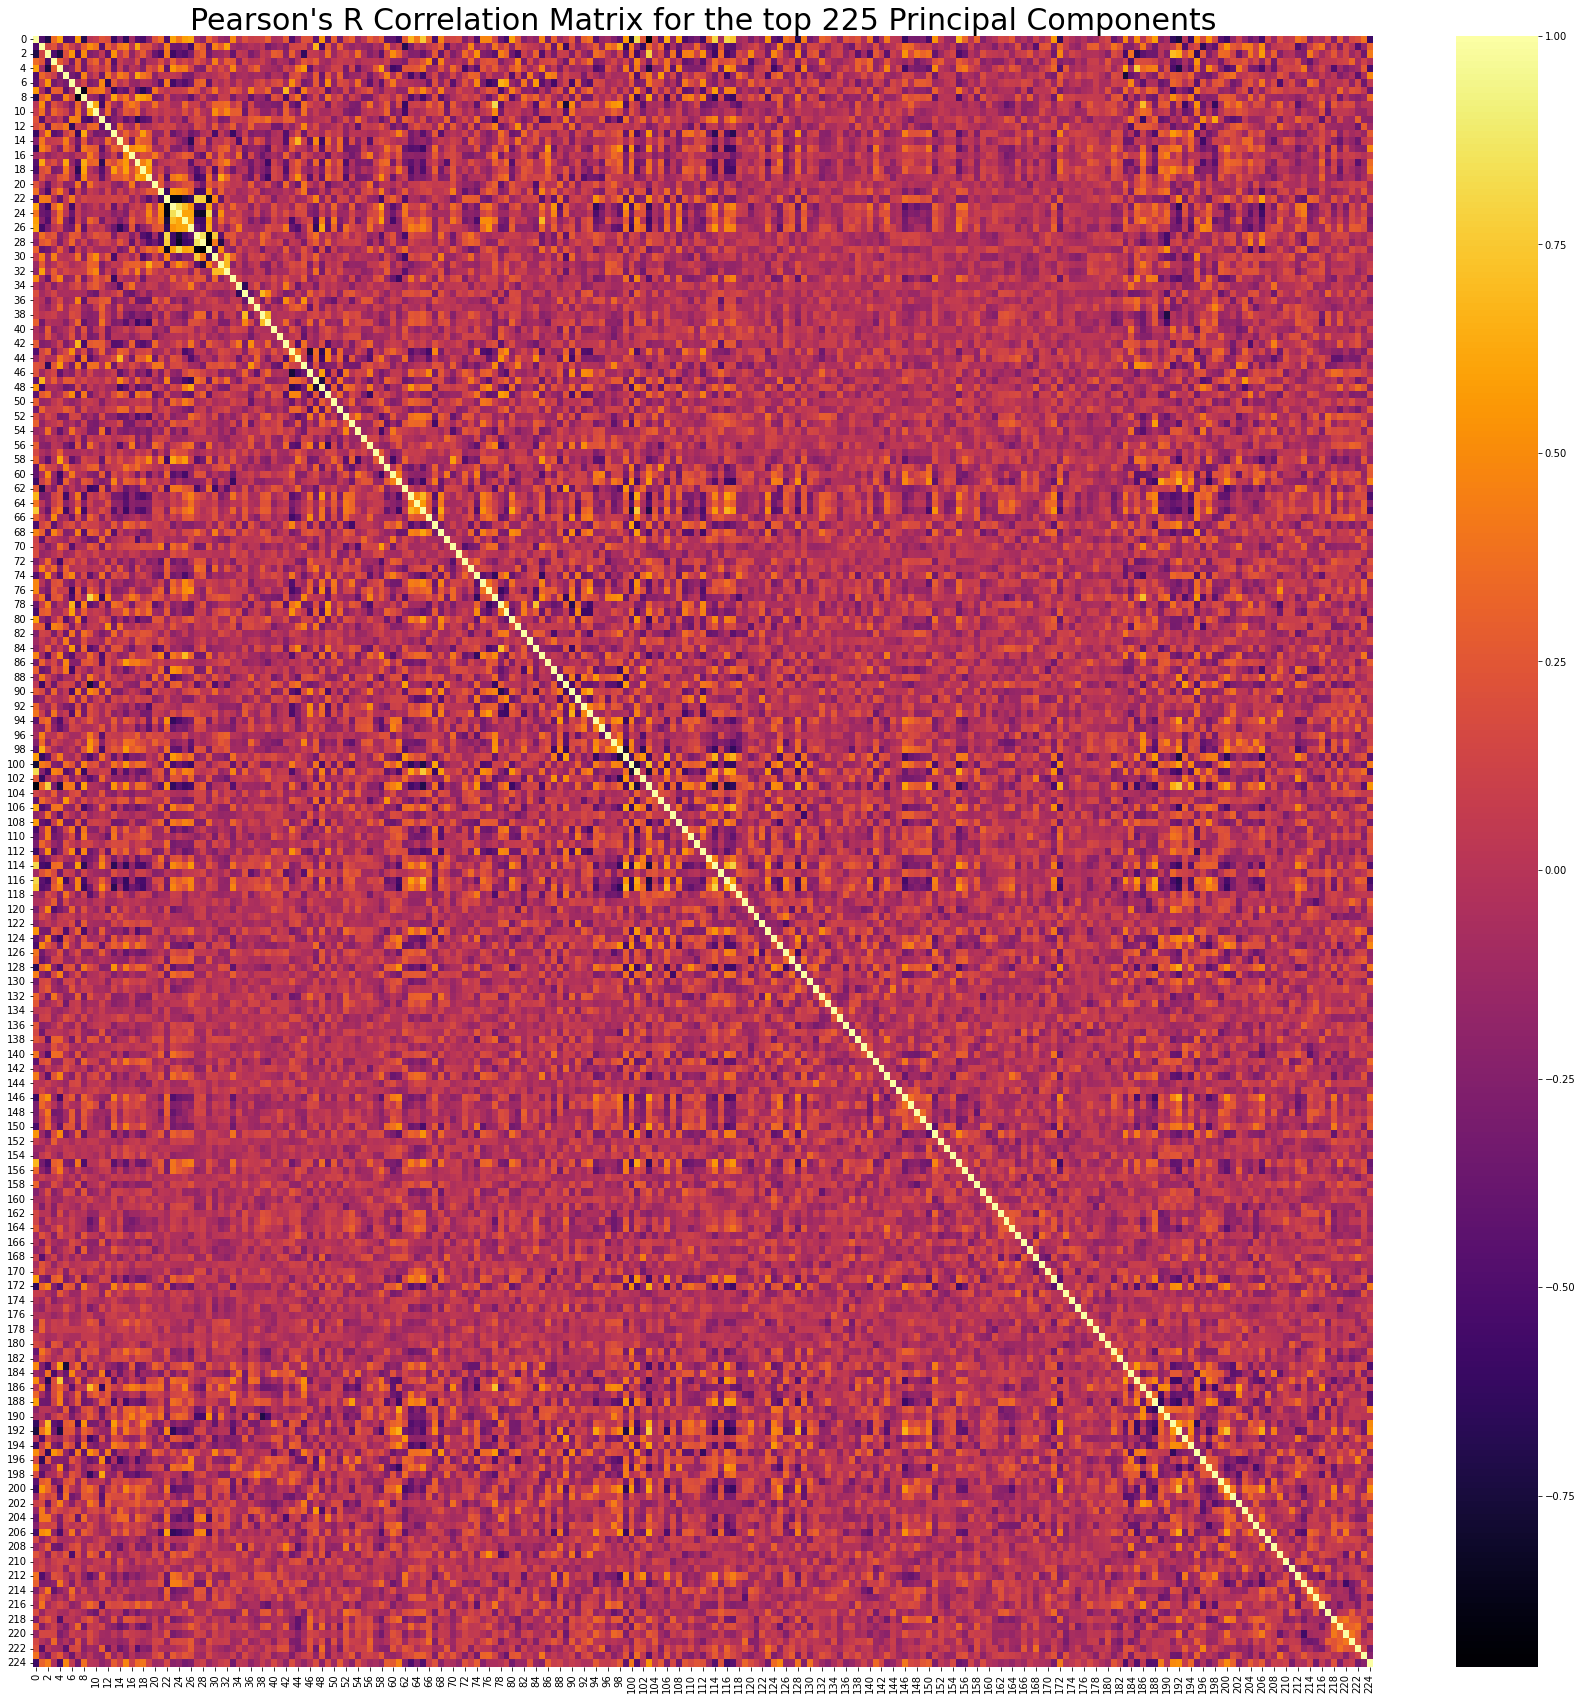

In [175]:
corr_mat = pd.DataFrame(Z).corr(method='pearson');
#mask = np.triu(np.ones_like(corr_mat, dtype=bool));
plt.figure(dpi=300);
plt.subplots(figsize=(30,30));
plt.title("Pearson's R Correlation Matrix for the top 225 Principal Components", fontsize=30);
sns.heatmap(corr_mat, annot=False, lw=0, linecolor='white', cmap='inferno');
#print('Too many features to visualize at once!')

## Plotting the Principal Components

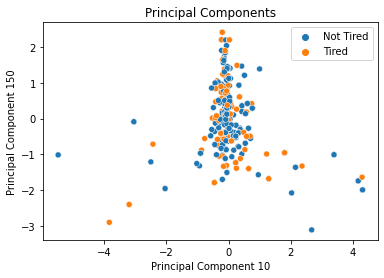

In [176]:
def label(n):
    if (n==0):
        return 'Not Tired'
    return 'Tired'

y_labeled = map(label, y)

p1=10;
p2=150;
ax1 = sns.scatterplot(x=Z[:,p1], y=Z[:,p2], hue=y_labeled);
ax1.set(title='Principal Components',
        ylabel=f'Principal Component {p2}',
        xlabel=f'Principal Component {p1}');

# Principal Component Analysis
## Calculate Principal Components

In [177]:
from sklearn.decomposition import PCA

information = 225; #99.9/100;
PrinCom=PCA(n_components=information, random_state = SEED)
PrinCom.fit(X_train)

Z_train = PrinCom.transform(X_train);
Z_test = PrinCom.transform(X_test);

print('Train set shape = ',Z_train.shape, '\nTest set shape  = ',Z_test.shape)


Z=PrinCom.transform(x)
pd.DataFrame(Z).describe() #Data No longer Standard
print(f"Using the first {Z.shape[1]} Principal Components describes {np.round(PrinCom.explained_variance_ratio_.sum() * 100,5)}% of the data.")
pd.DataFrame(Z)

Train set shape =  (270, 225) 
Test set shape  =  (68, 225)
Using the first 225 Principal Components describes 100.0% of the data.


,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
0,-175251.422462,-23842.842364,10954.293442,-2151.654981,14152.878047,-25614.451272,-1664.728322,-4603.220453,3448.461961,1436.758971,...,48.591601,17.229891,15.247600,27.669485,-95.915408,-48.282491,13.618762,42.370943,116.956987,0.247459
1,-175250.119447,-23841.785442,10954.140054,-2151.526077,14151.780238,-25614.762952,-1665.447984,-4603.005438,3448.348794,1436.856685,...,49.185990,17.604673,16.002204,28.420281,-95.973963,-48.069500,13.888114,42.709146,117.529108,-0.174406
2,-175251.335830,-23842.833561,10954.242437,-2151.777851,14153.261601,-25613.047833,-1665.323122,-4602.409850,3448.286098,1437.496047,...,48.603536,17.103236,15.429405,28.637195,-95.610359,-47.726341,14.283087,42.390855,116.877868,-0.141290
3,-175241.182882,-23850.276278,10952.749111,-2144.828391,14153.218861,-25618.423219,-1663.562719,-4602.028107,3443.179426,1436.514654,...,48.559533,17.423633,15.936331,27.993295,-96.249142,-47.903787,14.237880,43.706931,116.369336,-1.407045
4,-175251.467056,-23842.845792,10954.359851,-2151.673837,14152.917638,-25614.317717,-1665.067084,-4603.302252,3448.694737,1437.080376,...,48.982349,17.627625,15.505813,28.452674,-95.615502,-47.497960,13.937534,42.126980,117.503253,0.323058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,-175250.795573,-23842.931920,10954.493786,-2152.033988,14154.021915,-25608.147981,-1667.796810,-4603.981168,3448.139297,1436.595950,...,48.728508,16.831208,15.765025,27.720095,-96.433005,-48.130882,13.599169,43.035371,118.529558,-0.852606
334,-175249.961515,-23841.761837,10953.962385,-2151.526227,14151.093326,-25614.589022,-1665.181382,-4602.090645,3448.664410,1438.038220,...,48.257967,16.563388,15.904093,27.785535,-95.944034,-48.174513,13.977109,42.813079,117.721633,0.390096
335,-175251.409456,-23842.792455,10954.398554,-2151.624156,14152.951149,-25614.217307,-1665.064560,-4603.092885,3448.614308,1437.168204,...,48.911407,17.522782,15.148819,28.638920,-95.911266,-48.075788,14.450569,42.863520,116.813895,-0.041604
336,-175241.195132,-23832.731535,10957.107242,-2150.117342,14156.398945,-25616.657787,-1667.546487,-4600.246415,3449.744746,1441.406618,...,48.667160,16.088836,16.594481,28.510100,-95.185409,-48.401824,14.007848,42.071594,118.353530,-0.354493


## Scaling the Principal Components

In [178]:
scZ = StandardScaler();
Z = scZ.fit_transform(Z)
pd.DataFrame(Z).describe()

,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
count,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,...,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02
mean,-4.339230e-11,4.741956e-12,4.126156e-12,4.737361e-13,8.643809e-12,3.953500e-12,-2.636390e-13,1.508341e-12,-1.308866e-12,8.527470e-13,...,4.565776e-14,5.579068e-14,9.283173e-15,4.940624e-14,1.522015e-13,-1.233412e-13,8.030394e-15,3.086420e-14,-7.602072e-15,2.064424e-16
std,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,...,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00
min,-4.308762e-01,-4.665111e+00,-1.330942e+00,-2.758404e+00,-2.318553e+00,-3.421366e+00,-4.945442e+00,-2.948006e+00,-6.337302e+00,-3.359416e+00,...,-3.103604e+00,-4.286655e+00,-3.079689e+00,-2.892747e+00,-3.311610e+00,-2.895423e+00,-4.402610e+00,-3.474477e+00,-3.511065e+00,-3.331513e+00
25%,-4.163588e-01,-3.095707e-02,-2.810485e-01,-2.274643e-01,-2.118622e-01,-2.008764e-01,1.048680e-01,-3.233650e-01,-6.597706e-02,-2.760850e-01,...,-5.988356e-01,-3.741096e-01,-6.294585e-01,-5.946006e-01,-6.048934e-01,-5.967532e-01,-6.034861e-01,-5.267081e-01,-6.454956e-01,-5.582734e-01
50%,-3.880368e-01,-1.340429e-02,-2.448583e-01,-1.920830e-01,3.157758e-02,-8.949882e-02,2.597369e-01,-2.189596e-01,1.914717e-01,-1.059860e-01,...,3.828533e-02,7.872372e-02,-1.995311e-01,-1.112298e-01,-4.287642e-02,-4.369262e-02,-3.669096e-02,-7.091629e-02,-3.699662e-03,1.186443e-01
75%,-9.892660e-02,1.613745e-01,-1.942030e-01,-6.615229e-02,1.563735e-01,1.072329e-01,3.129769e-01,-2.114726e-02,3.724788e-01,-1.643395e-02,...,5.642237e-01,6.208509e-01,4.940675e-01,6.318945e-01,5.534963e-01,6.215982e-01,6.196974e-01,4.357880e-01,5.690191e-01,7.355314e-01
max,4.653490e+00,3.953125e+00,6.776723e+00,8.903224e+00,4.809289e+00,3.996685e+00,3.653201e+00,6.253422e+00,5.990513e+00,6.543511e+00,...,3.111318e+00,2.108289e+00,4.555847e+00,3.977725e+00,4.049554e+00,3.576246e+00,2.277893e+00,3.136607e+00,3.497618e+00,2.145039e+00


## Image Creation

In [179]:
## Scale all the PCA components on 0-256

def gen_images(data):
    images=[];
    for r in range(0,data.shape[0]): #Cycle over rows
        pixels=[];
        mini=min(data[r,:])
        maxi=max(data[r,:])
        m = (maxi-mini)/(256);

        for c in range(0,225): #Cycle over cols
            pixels.append(m * data[r,c] - mini);

        #once cols are done running
        img = np.reshape(pixels, (15,15)); #reshape into a square image
        images.append(img)
    return images;
    
all_images      = gen_images(Z)
x_train_img = gen_images(Z_train)
x_test_img  = gen_images(Z_test)

#Reshape into input shape for CNN models
x_train_img = np.array(x_train_img).reshape(270,15,15,1)
x_test_img  = np.array(x_test_img).reshape(68,15,15,1)
all_images  = np.array(all_images).reshape(338,15,15,1)

This image is for 0.0


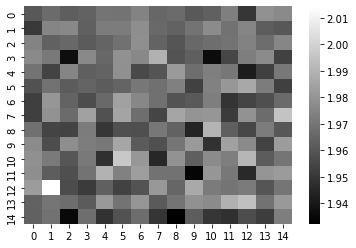

In [180]:
#first row of data
sns.heatmap(gen_images(Z)[0], cmap='gray');
print(f'This image is for {y[0]}')

This image is for 0.0


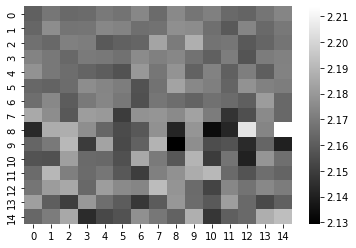

In [181]:
#nth row of data
n=112
sns.heatmap(gen_images(Z)[n], cmap='gray');
print(f'This image is for {y[n]}')

# ML Models

## Definitions

In [182]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold

#Callbacks
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

## Basic ANN Model

In [183]:
models = []; #to hold: (str: name, model: model, data_to_take: z/img)

In [184]:
def build_basicANN(optimizer='adam', epochs=100, batch_size=50, neurons=225):
    
    #Initializing ANN
    m= tf.keras.models.Sequential()
    
    #Add input layer
    m.add(tf.keras.layers.Dense(units=neurons, activation='relu'))
    
    #Add hidden layer
    m.add(tf.keras.layers.Dense(units=(neurons/2), activation='relu'))
    
    #Add output layer
    m.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    
    #Compiling ANN
    m.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #Return compiled, unfitted model
    return m;

In [185]:
%%time

#Build Model, Using defaults
## mANNBasic = build_basicANN() 
mANNBasic = (KerasClassifier(build_fn=build_basicANN, epochs=100, batch_size=50, optimizer='adam', verbose=0));

#Training ANN
hist_ANNBasic = mANNBasic.fit(Z_train, y_train, batch_size = 100, epochs = 100, verbose=0)

models.append(('ANN Basic', mANNBasic, 'z'))

Wall time: 904 ms


In [186]:
print(f'Accuracy of the unoptimized Basic ANN model = {round(accuracy_score(y_true=y_test, y_pred=mANNBasic.predict(x=Z_test)) * 100,3)}%')

Accuracy of the unoptimized Basic ANN model = 100.0%


## Basic CNN Model

In [187]:
# Random-ish architecture

def build_basicCNN(optimizer='adam', epochs=100, batch_size=50, neurons=225):
    
    m = tf.keras.models.Sequential()
    m.add(tf.keras.layers.Conv2D(filters=neurons, kernel_size=3, activation='relu', input_shape=[15, 15, 1]))
    m.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    m.add(tf.keras.layers.Conv2D(filters=neurons/2, kernel_size=3, activation='relu'))
    m.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    m.add(tf.keras.layers.Flatten())
    m.add(tf.keras.layers.Dense(units=neurons, activation='relu'))
    m.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    m.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

    return m;


In [188]:
%%time

#Build model using defaults
#mCNNBasic = build_basicCNN()
mCNNBasic = (KerasClassifier(build_fn=build_basicCNN, epochs=100, batch_size=50, optimizer='adam', verbose=0));

hist_CNNBasic = mCNNBasic.fit(x=x_train_img,
                      y=y_train, 
                      batch_size = 50,
                      epochs = 100, 
                      verbose=0,
                      callbacks=es,
                      validation_data=(x_test_img, y_test))

models.append(('CNN Basic', mCNNBasic, 'img'))

Restoring model weights from the end of the best epoch.
Epoch 00014: early stopping
Wall time: 2.62 s


In [189]:
print(f'Accuracy of the unoptimized Basic CNN model = {round(accuracy_score(y_true=y_test, y_pred=mCNNBasic.predict(x=x_test_img)) * 100,3)}%')

Accuracy of the unoptimized Basic CNN model = 100.0%


## Advanced CNN Model

In [190]:
def build_advancedCNN(optimizer='adam', epochs=100, batch_size=50, neurons=256):
    #params
    initFilt = neurons;
    initUnits= neurons;
    
    #model
    m = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=initFilt, kernel_size=3, activation='relu', input_shape=[15,15,1]),
        tf.keras.layers.Conv2D(filters=initFilt/2, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=initUnits),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

    m.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return m;

In [191]:
%%time

# build using defaults
#mCNNAdvanced = build_advancedCNN()
mCNNAdvanced = (KerasClassifier(build_fn=build_advancedCNN, epochs=100, batch_size=50, optimizer='adam', verbose=0));

#fit
hist_CNNAdvanced = mCNNAdvanced.fit(x_train_img,
                      y=y_train, 
                      batch_size = 50,
                      epochs = 100, 
                      verbose=0,
                      callbacks=es,
                      validation_data=(x_test_img, y_test))

models.append(('CNN Advanced', mCNNAdvanced, 'img'))

Restoring model weights from the end of the best epoch.
Epoch 00012: early stopping
Wall time: 8.95 s


In [192]:
print(f'Accuracy of the unoptimized Advanced CNN model = {round(accuracy_score(y_true=y_test, y_pred=mCNNAdvanced.predict(x=x_test_img)) * 100,3)}%')

Accuracy of the unoptimized Advanced CNN model = 100.0%


## Random Forest Model

In [193]:
%%time
from sklearn.ensemble import RandomForestClassifier
RFCmodel = RandomForestClassifier(n_estimators=100); #N_estimators and criterion can be optimized.
RFCmodel.fit(Z_train, y_train);
models.append(('RF', RFCmodel, 'z'));

Wall time: 220 ms


## Logistic Regression Model

In [194]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(solver='newton-cg');
LRmodel.fit(Z_train, y_train);
models.append(('LR',LRmodel, 'z'));

# Performance Comparison
## Via K-Fold Cross-Validation

In [195]:
# kfold = StratifiedKFold(n_splits=N, shuffle=True)
# tmp_results = model_selection.cross_val_score(mANNBasic, Z, y, cv=kfold, scoring=scoring);
# pd.DataFrame(tmp_results)

In [196]:
#Suppress warnings for non-convergent ANN models
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Number of splits to make.
N = 3;


CV_results = [];
scoring = 'accuracy';

trun=0;
for tp in models:
    
    #Check whether model uses Z dataset or images for training
    mode = tp[2];
    
    if (mode == 'z'):
        kfold = StratifiedKFold(n_splits=N, shuffle=True)
        #kfold = model_selection.KFold(n_splits=N);
        CVinternal_results = model_selection.cross_val_score(tp[1], Z, y, cv=kfold, scoring=scoring);
        CV_results.append((CVinternal_results));
        
    if (mode == 'img'):
        kfold = StratifiedKFold(n_splits=N, shuffle=True)
        #kfold = model_selection.KFold(n_splits=N);
        CVinternal_results = model_selection.cross_val_score(tp[1], all_images, y, cv=kfold, scoring=scoring);
        CV_results.append((CVinternal_results));    
    
    print(f'run#{trun} returned {CVinternal_results}')
    trun+=1;
    
    

run#0 returned [1. 1. 1.]
run#1 returned [0.81415929 0.77876106 0.73214286]
run#2 returned [0.75221239 0.69911504 0.65178571]
run#3 returned [1. 1. 1.]
run#4 returned [1. 1. 1.]


In [197]:
pd.DataFrame(CV_results)

,0,1,2
0,1.000000,1.000000,1.000000
1,0.814159,0.778761,0.732143
2,0.752212,0.699115,0.651786
3,1.000000,1.000000,1.000000
4,1.000000,1.000000,1.000000


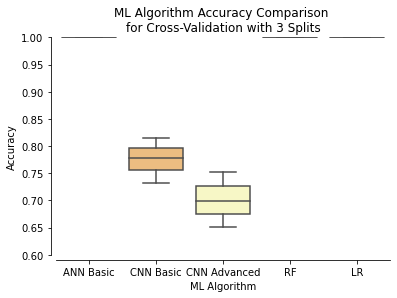

In [198]:
names = [];
for tp in models:
    names.append(tp[0]);

CV_results = pd.DataFrame(CV_results).T;
CV_results.columns = names;

ax2 = sns.boxplot(data=CV_results, palette='Spectral')
ax2.set(xlabel = "ML Algorithm",
       ylabel = 'Accuracy',
       title = f"ML Algorithm Accuracy Comparison \nfor Cross-Validation with {N} Splits");
sns.despine(ax=ax2,offset=5, trim=False)
ax2.plot();
plt.ylim(0.6,1);

In [199]:
#reset data
#data_T = original_T.copy();
#data_NT = original_NT.copy();

#Reload FG
#from importlib import reload
#reload(FG)